<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)


# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# **Loading the dataset**

In [5]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_main = pd.read_csv('/content/drive/MyDrive/Python Course/EasyVisa.csv')

In [7]:
# copying data to avoid changes to the original data
data = df_main.copy()

# **Overview of the Dataset**

* Observations

* Sanity checks

In [8]:
# view the first 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [9]:
# view the last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


* At a glance, we can see that Asia has a high frequency under the Continent column, unit of wage appears to have high frequency of year and most are Full time positions with "Y" having high frequency

### Understand the shape of the dataset.

In [10]:
data.shape

(25480, 12)

* The dataset has 25,480 rows and 12 columns of data

In [11]:
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


* There are no missing values in this dataset

### Check the data types of the columns for the dataset.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are no null values in the dataset
* We can convert the object type columns to categories

In [13]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [14]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


* The datatypes have been successfully converted to categories

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


* Number of Employees shows a minumum with a negative value which may warrant further investigation
* The average Number of Employees is 5,667 while the median is 2,109 employees
* The earliest year of establishment for a company is 1800, the latest is noted to be in 2016
* The average Prevailing Wage is 74,455 while the median is 70,308

In [17]:
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV9999,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* case_id column is made up of only unique values and does not add valuable information to this analysis
* Candidates from Asia make up the most in this dataset
* Most candidates have a Bachelor's Degree compared to other degrees
* Most candiates have job experience and do not require job training
* It appears Northeast is the most popular region of intended employment
* Most have Annual, or Yearly, unit of wage
* Overall, certified visas outweigh denied visas in this dataset

Look at unique values of all categories

In [18]:
cols_cat= data.select_dtypes(['category'])

In [19]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in case_id are :
case_id
EZYV9999     1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV10000    1
EZYV1000     1
EZYV100      1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_

Drop columns which are not adding valuable information

In [20]:
# case_id is unique for each candidate and might not add value to modeling
data.drop(['case_id'],axis=1,inplace=True)

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

### Univariate analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

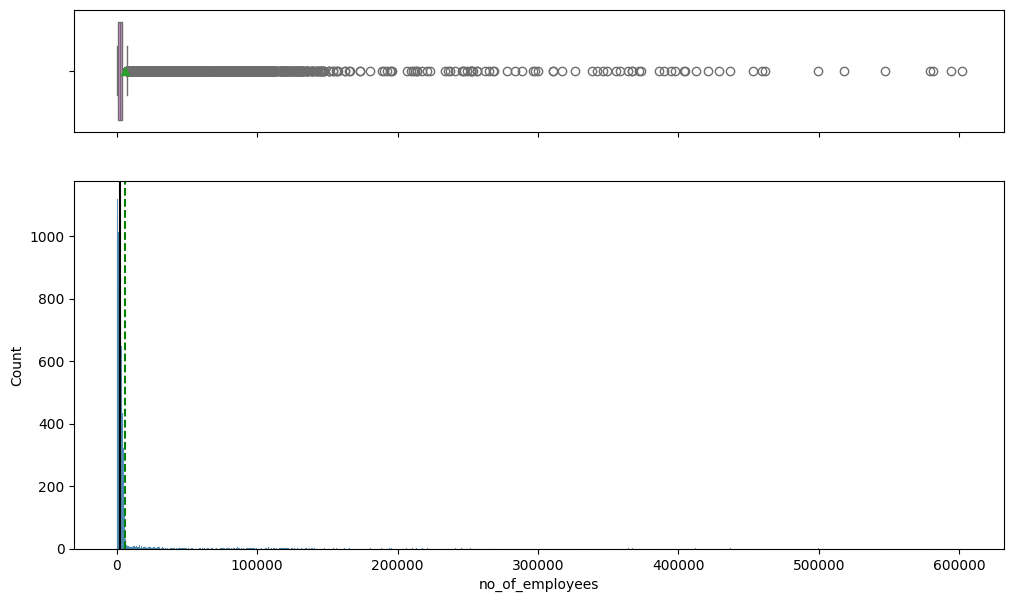

In [22]:
histogram_boxplot(data, 'no_of_employees')

* The distribution of No_of_employees is right skewed
* Outliers include companies with >3504 employees (this value is 75th percentile and any value greater than this is considered an outlier)
* Of note, the majority of companies in this dataset have relatively smaller number of employees

In [23]:
data[data["no_of_employees"] > 3504]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
6,Asia,Bachelor's,N,N,4985,1994,South,53635.390,Year,Y,Certified
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.190,Year,Y,Certified
11,Asia,High School,Y,N,4069,2005,Northeast,70813.090,Year,Y,Denied
...,...,...,...,...,...,...,...,...,...,...,...
25448,Europe,Doctorate,Y,N,4119,1971,West,86894.100,Year,Y,Certified
25455,South America,Bachelor's,N,N,24335,1993,Midwest,97393.490,Year,Y,Certified
25459,Asia,High School,Y,N,4727,1990,Midwest,53952.840,Year,Y,Denied
25464,Asia,Master's,N,N,48785,1974,South,145102.360,Year,N,Certified


* There is not obvious pattern in the outliers of Number of Employees in this dataset

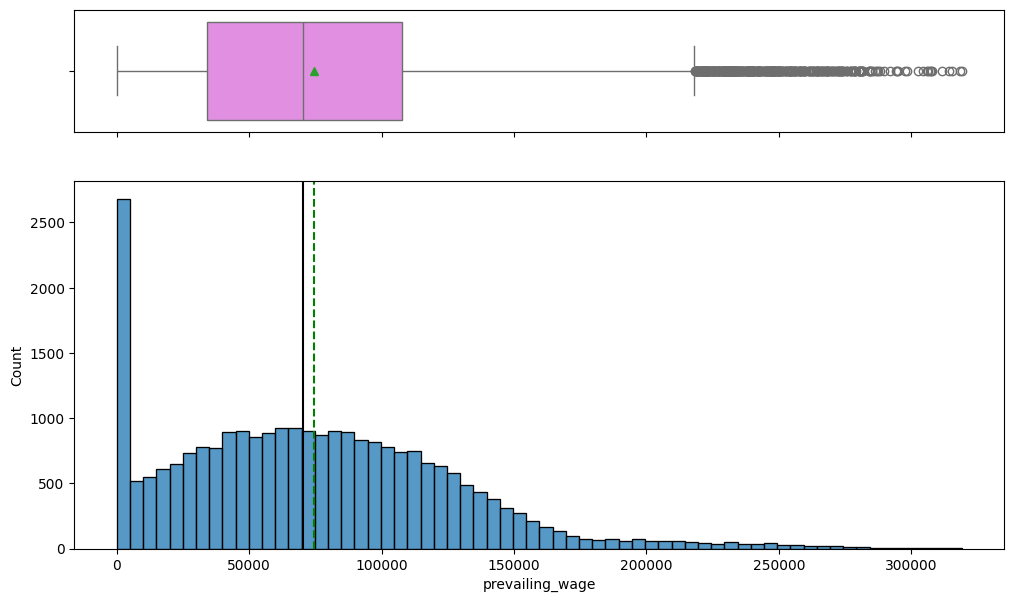

In [24]:
histogram_boxplot(data, 'prevailing_wage')

* The distribution of 'prevailing_wage' is right-skewed.
* Outliers are noted to be >107,735 (the 75th percentile as noted by the data summary).
* Of note, the peak is found to be at the far left showing majority of employees have prevailing wage on the lower end of the spectrum.

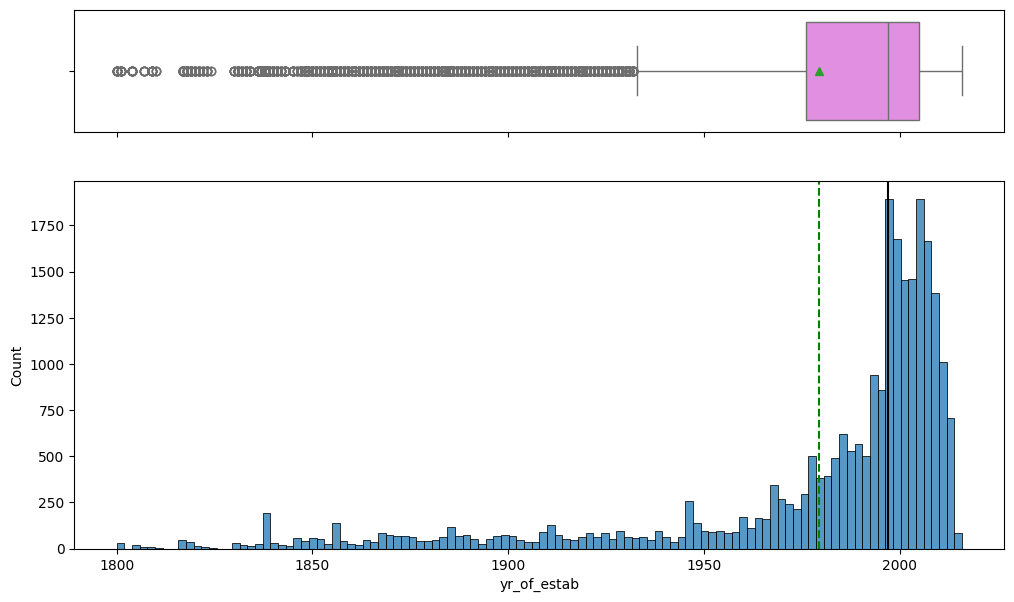

In [25]:
histogram_boxplot(data, 'yr_of_estab')

* This distribution of Year of Establishment is left-skewed
* The majority of companies are modern and established more recently in this dataset
* The average number of companies were established in 1979 while the median number of companies were established in 1997

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

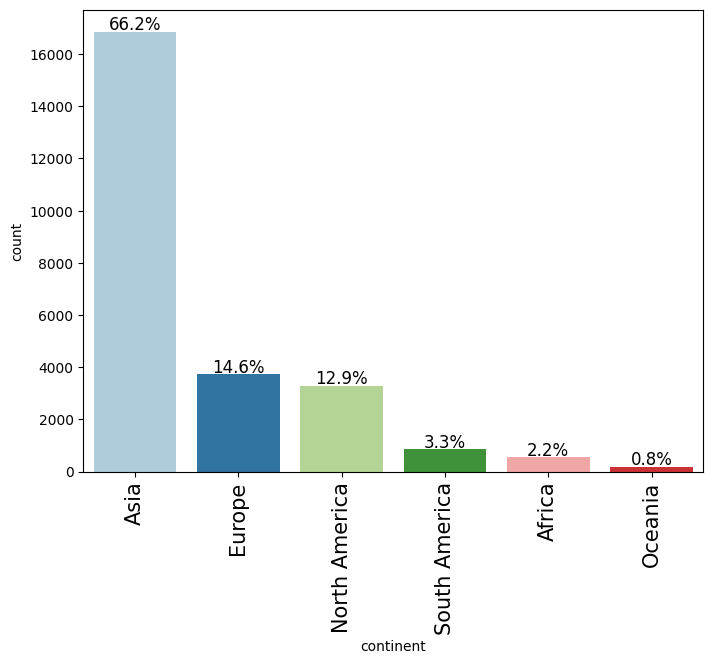

In [27]:
labeled_barplot(data, 'continent', perc=True)

* 66.2% employees are from Asia, significantly higher than other continents with Europe following at 14.6%

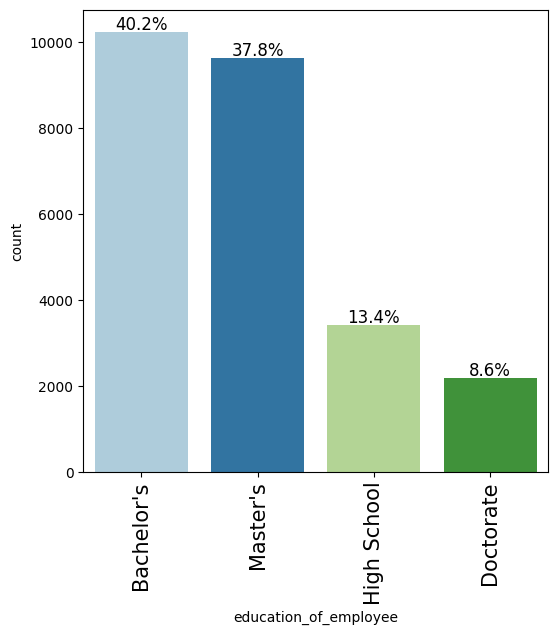

In [28]:
labeled_barplot(data, 'education_of_employee', perc=True)

* Employees with Bachelor's Degree make up 40.2% in this dataset, closely followed by Master's Degree at 37.8%
* High school only makes up 13.4% and Doctorate at 8.6%

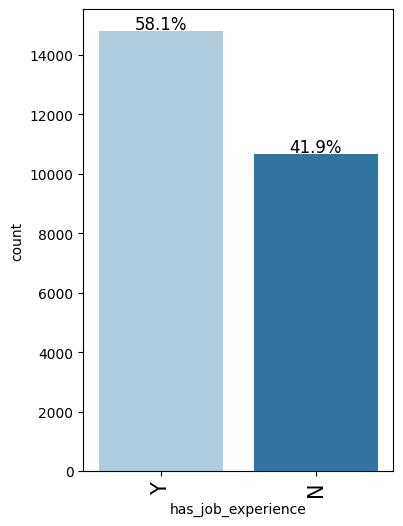

In [29]:
labeled_barplot(data, 'has_job_experience', perc=True)

* Employees with job experience is 58.1% compared to no job experience at 41.9%

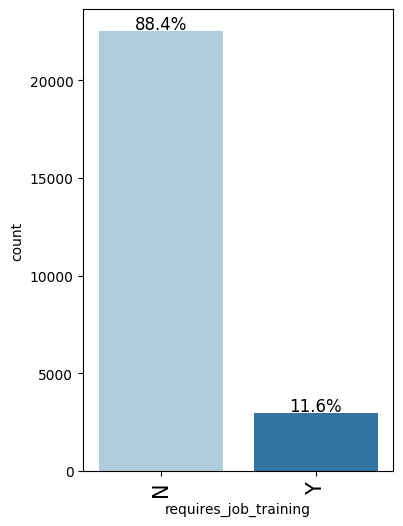

In [30]:
labeled_barplot(data, 'requires_job_training', perc=True)

* Majority of employees at 88.4% do not require job training as compared to 11.6% that do.

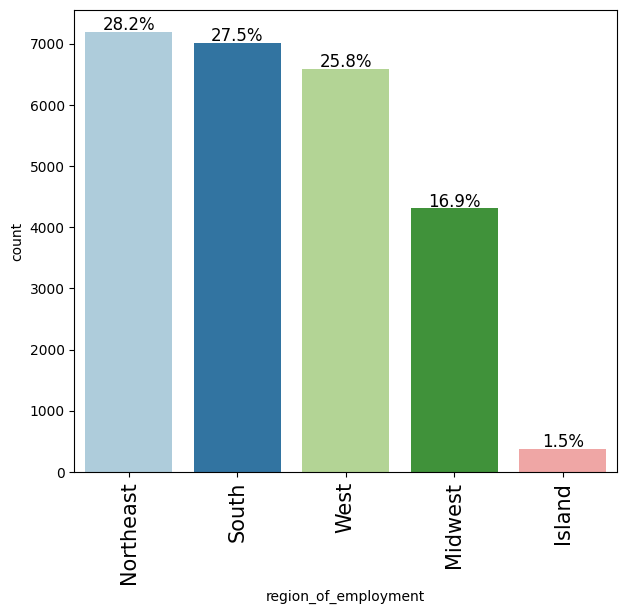

In [31]:
labeled_barplot(data, 'region_of_employment', perc=True)

* The Northeast (28.2%), South (27.5%), and West (25.8%) are most popular in the Intended region of employment
* The Island region is lowest at 1.5%

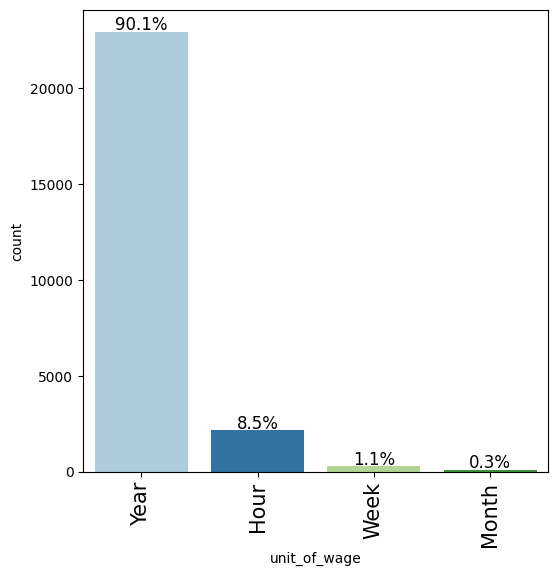

In [32]:
labeled_barplot(data, 'unit_of_wage', perc=True)

* Yearly wage is the most commonly used for employees in this dataset at 90.1%
* Hourly wage follows at 8.5%

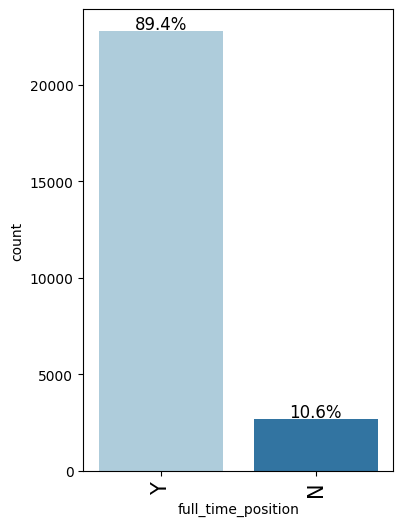

In [33]:
labeled_barplot(data, 'full_time_position', perc=True)

* The full time positions are 89.4% compared to part-time at 10.6%

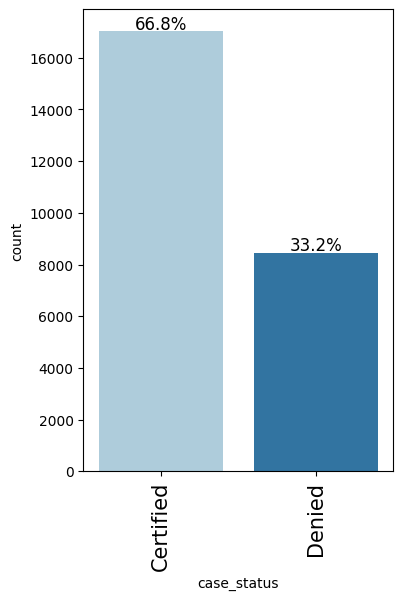

In [34]:
labeled_barplot(data, 'case_status', perc=True)

* Certified employees are 66.8% compared to denied at 33.2%

### Bivariate analysis

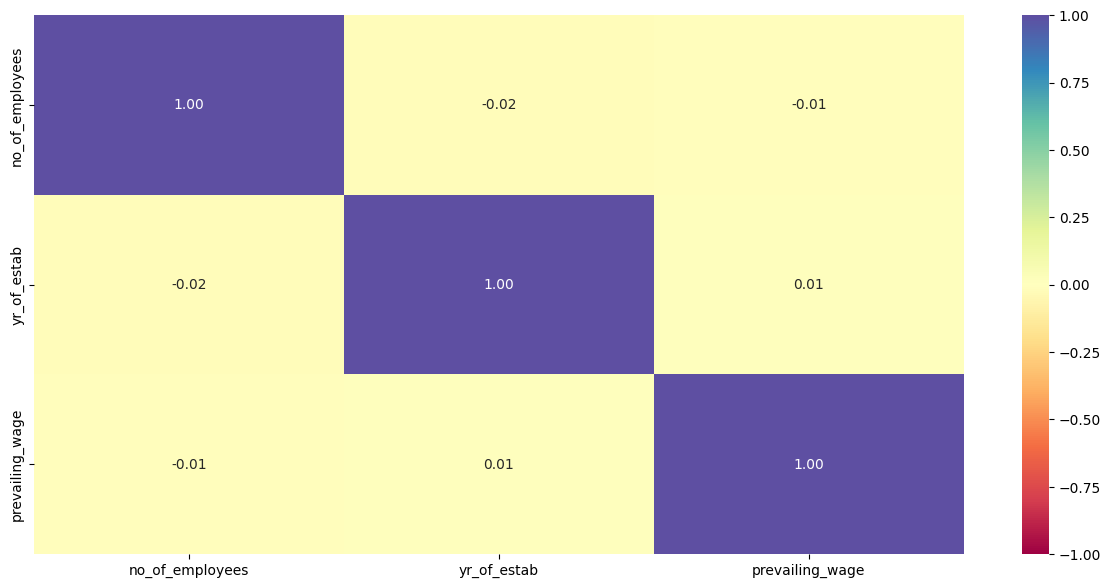

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no strong correlation with the numerical datatypes in this dataset

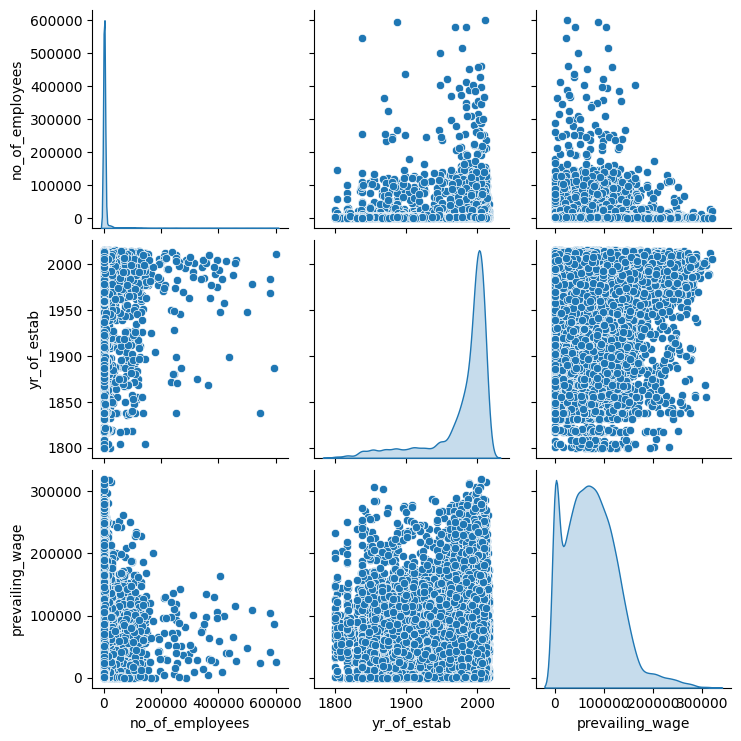

In [36]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

In [37]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


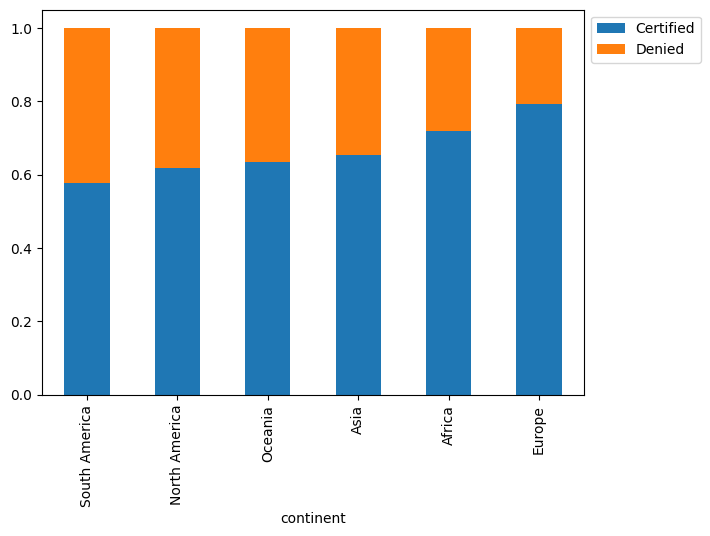

In [38]:
# case status vs continent
stacked_barplot(data, 'continent', 'case_status')

* Employees of South America have the most visas denied followed by North America, then Oceania
* Europe has the most certified visas (least denials)

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


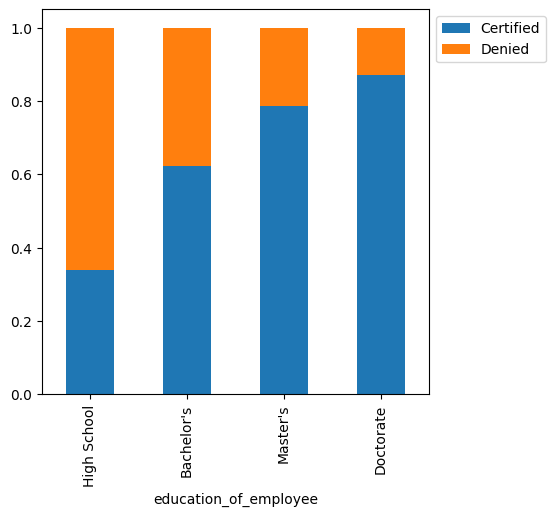

In [39]:
# case status vs education of employee
stacked_barplot(data, 'education_of_employee', 'case_status')

* Employees with only High School Degrees receive the most denials, significantly more than any other education level of employee
* According to this dataset, the higher the education level, the more likely they will be certified; the lower the education level, the more likely they will be denied
* The doctorate received the most certifications

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


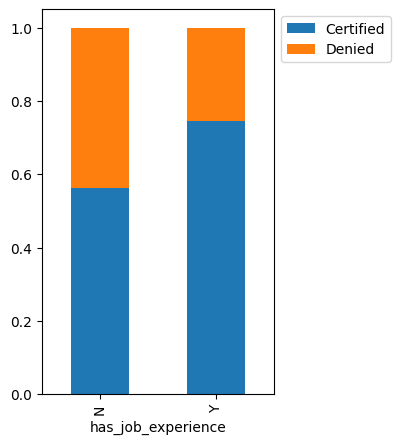

In [40]:
# case status vs has job experience
stacked_barplot(data, 'has_job_experience', 'case_status')

* Employees without job experience are more likley to be denied at ~ 35% than those with job experience ~25%

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


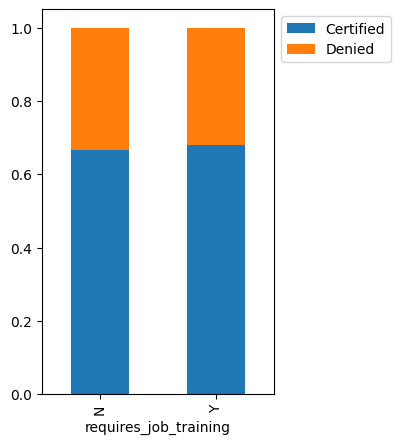

In [41]:
# case status vs requires job training
stacked_barplot(data, 'requires_job_training', 'case_status')

* There is no significant difference in certifications/ denials for employees that require job training.
* Regardless of need for job training, denials are at ~35%

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


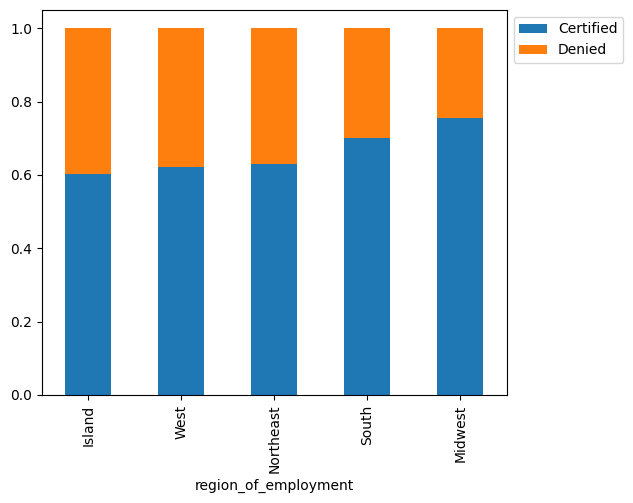

In [42]:
# case status vs region of employment
stacked_barplot(data, 'region_of_employment', 'case_status')

* The Island, West and Northeast region have the most denials when compared to other regions
* Visas are least denied in the Midwest


case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


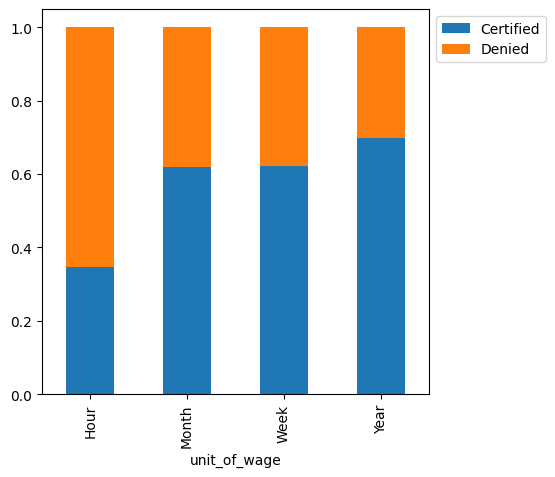

In [43]:
# case status vs unit of wage
stacked_barplot(data, 'unit_of_wage', 'case_status')

* Employees with hourly wage appear to have the most denials at ~65%
* Yearly wage has the least denials at ~35%

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


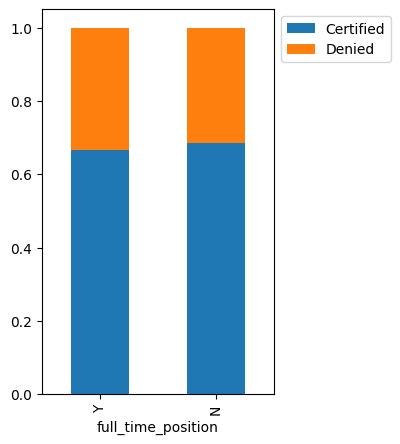

In [44]:
# case status vs education of employee
stacked_barplot(data, 'full_time_position', 'case_status')

* There is no significant difference between employees with full time vs part time positions
* Both appear around ~35% denials

In [45]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

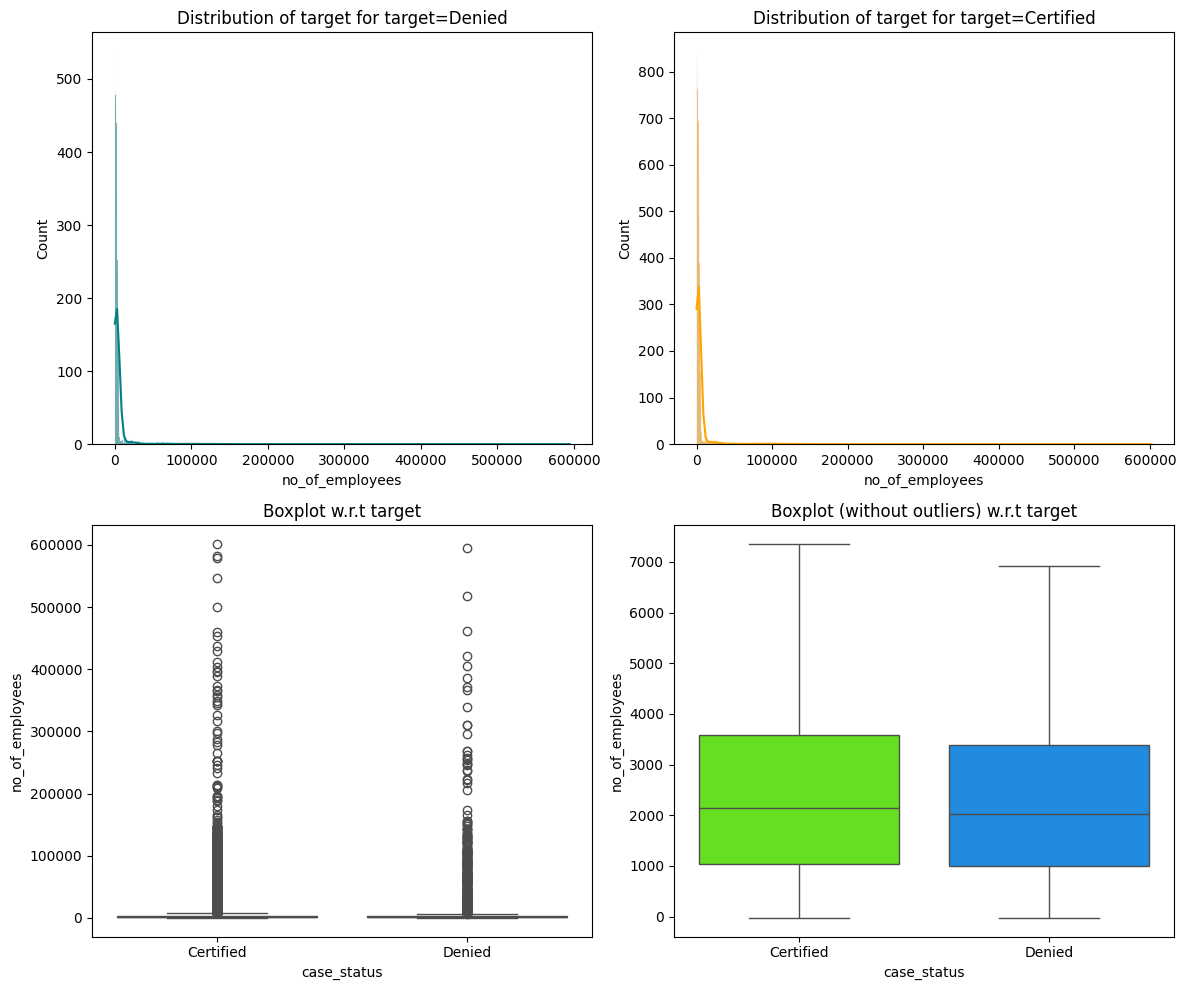

In [46]:
distribution_plot_wrt_target(data, 'no_of_employees', 'case_status')

* The distribution for employees certified vs denied is not significantly different

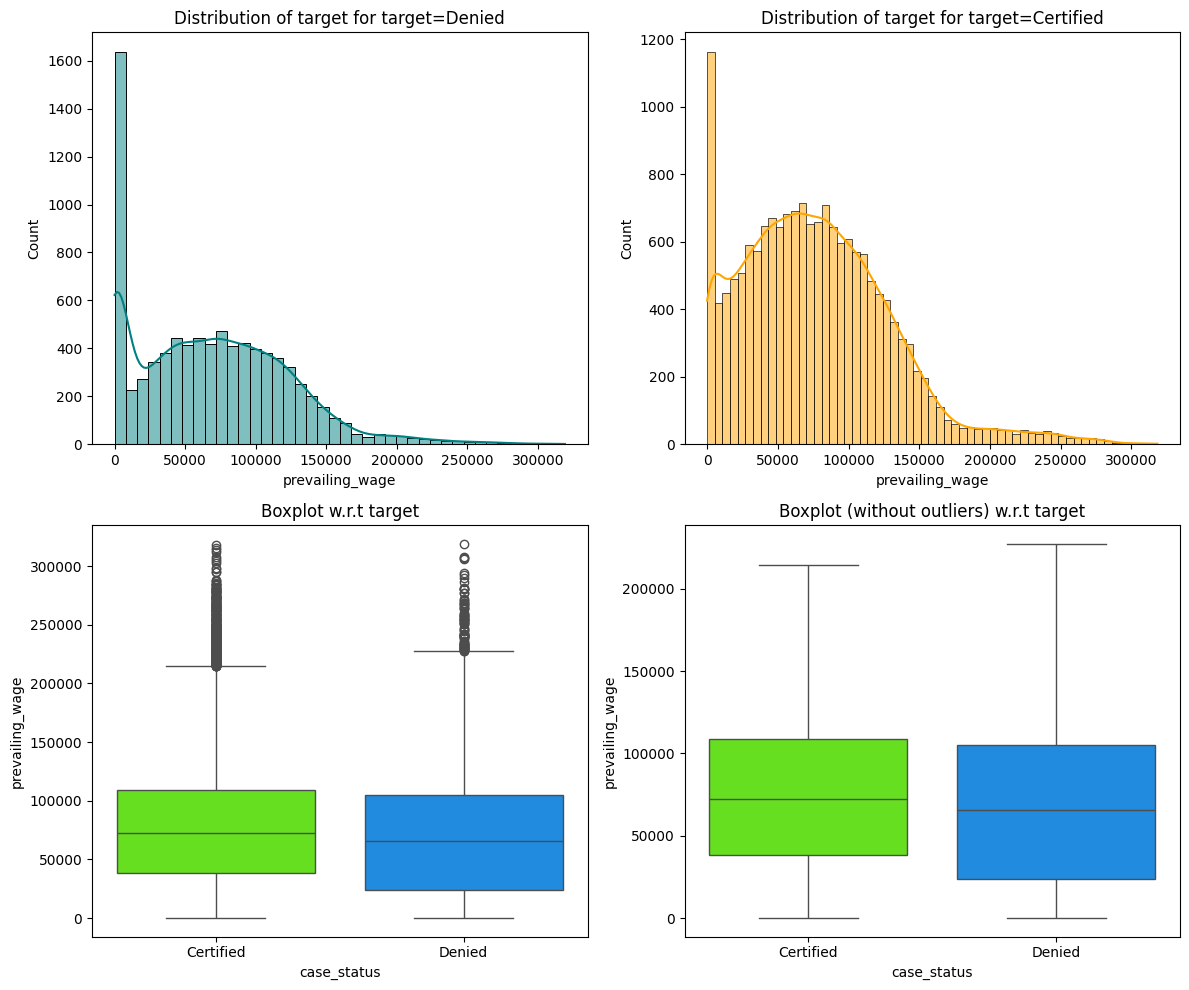

In [47]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

* There is no significant difference for employees certified vs denied based on prevailing wage

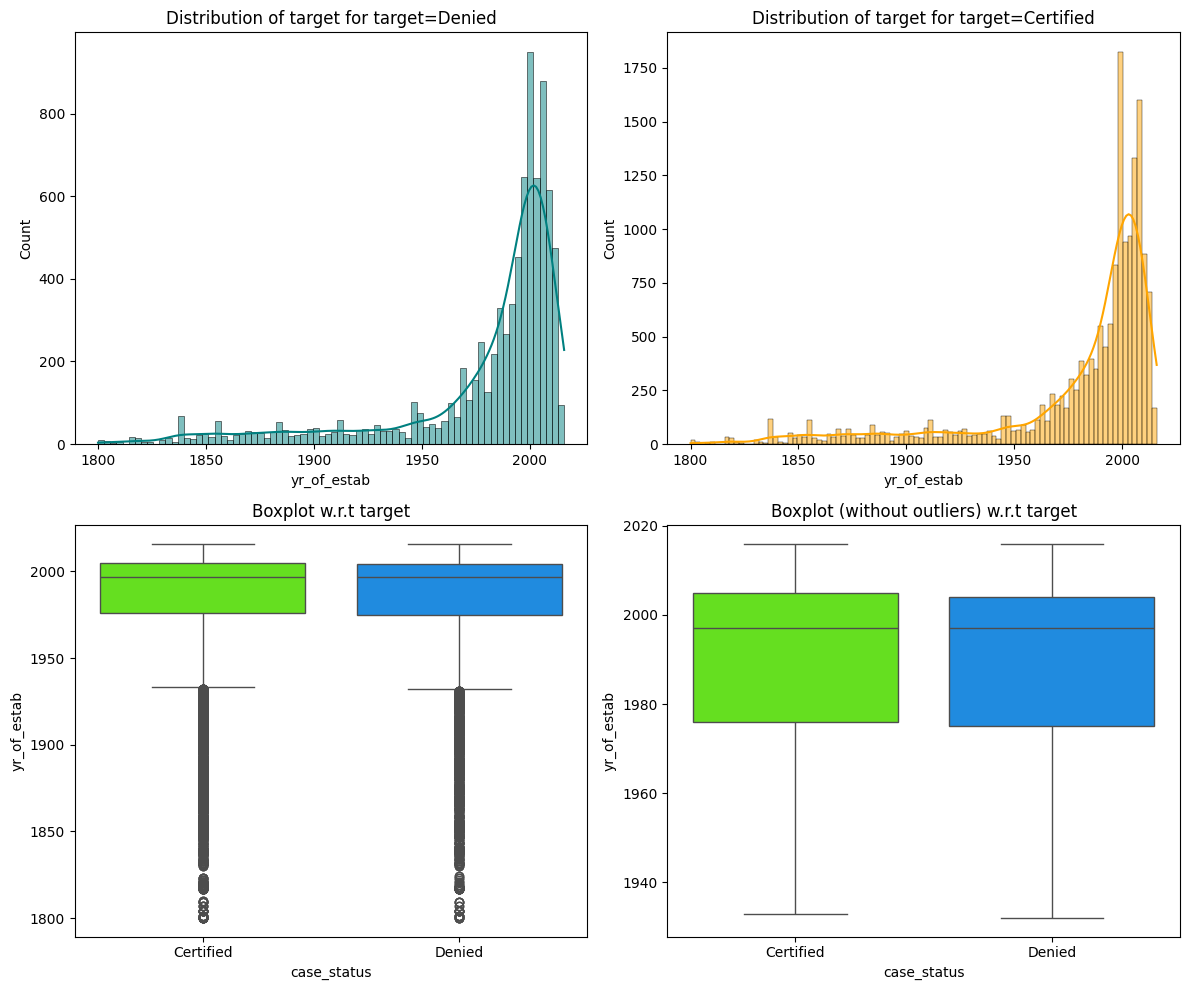

In [48]:
distribution_plot_wrt_target(data, 'yr_of_estab', 'case_status')

* There is no significant difference for employees certified or denied based on year of establishment

### Leading Questions

1. What is the distribution of visa case statuses (certified vs. denied)?

In [49]:
# Find the distribution of visa case statuses (certified vs denied)
data['case_status'].value_counts()

,count
case_status,
Certified,17018
Denied,8462


* In this dataset, there are 17,018 candidates with certified visas vs 8,462 that were denied

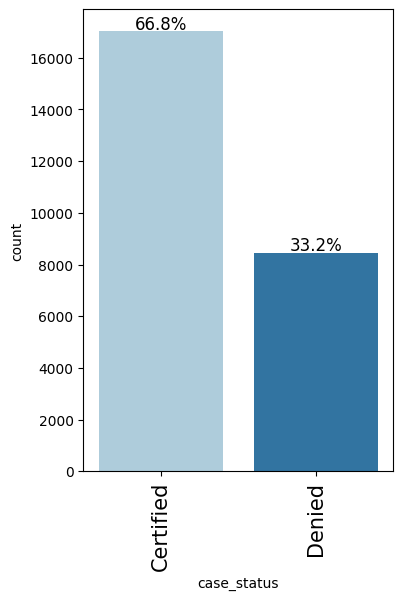

In [50]:
labeled_barplot(data, 'case_status', perc=True)

* Certified visas in this dataset are about ~66.8% as compared to 33.2% denied

2. How does the education level of employees impact visa approval rates?

In [51]:
# How does education level of employees impact visa approval rates
data.groupby('education_of_employee')['case_status'].value_counts()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: count, dtype: int64

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


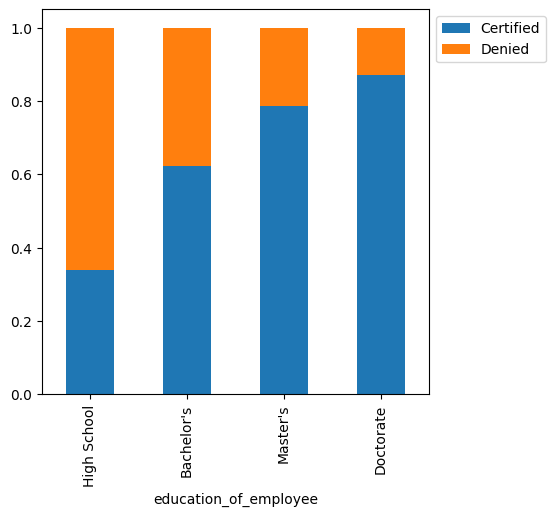

In [52]:
stacked_barplot(data, 'education_of_employee', 'case_status')

* Employees with only High School Degrees receive the most denials, significantly more than any other education level of employee
* According to this dataset, the higher the education level, the more likely they will be certified; the lower the education level, the more likely they will be denied
* The doctorate received the most certifications

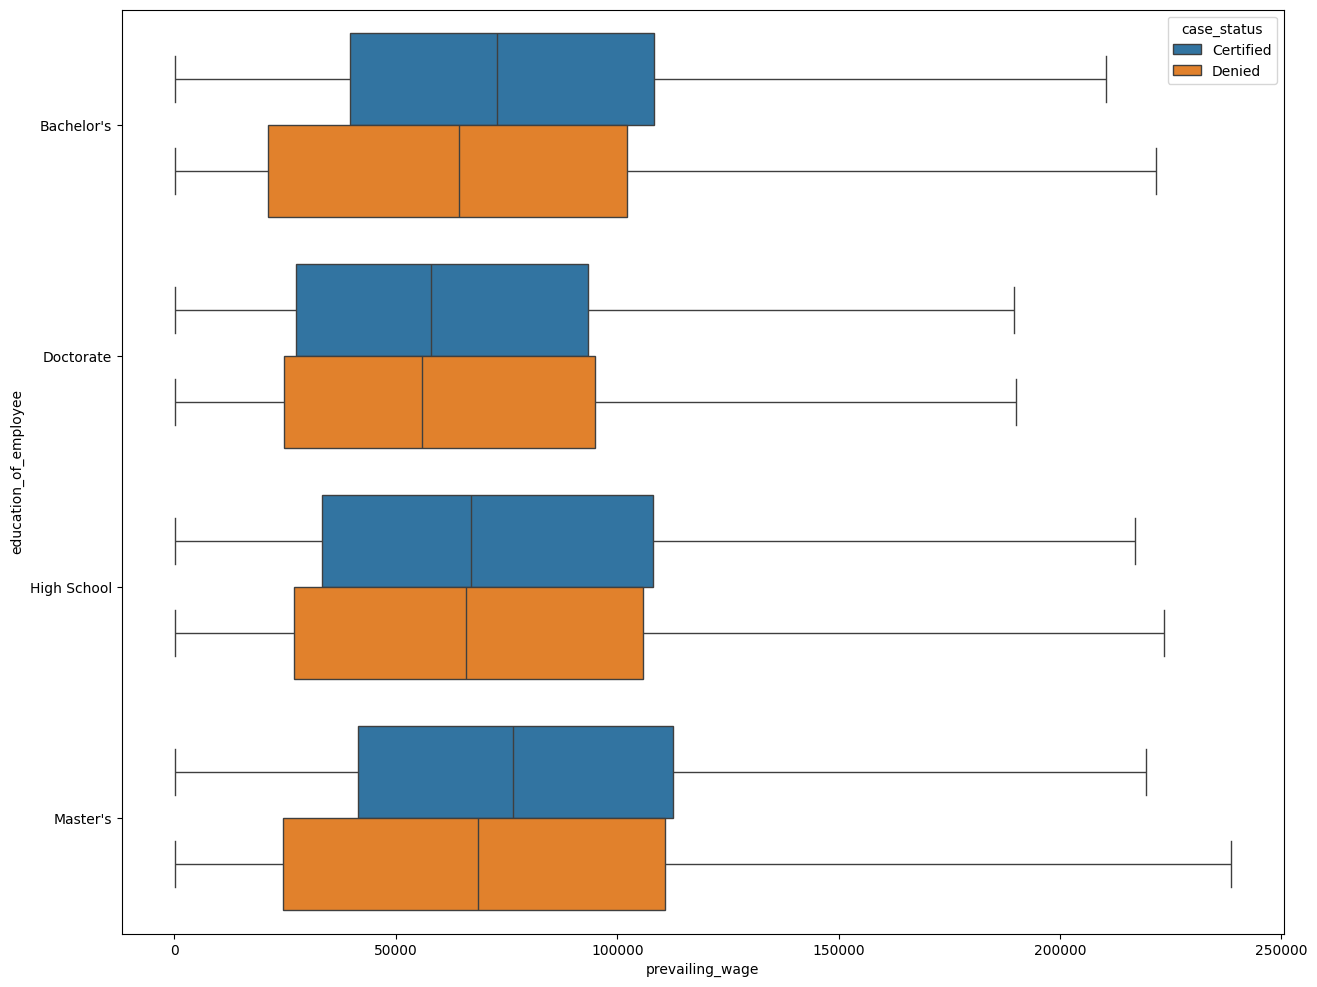

In [53]:
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="education_of_employee", x="prevailing_wage", data=data, hue="case_status", showfliers=False
)
plt.show()

3. Is there a significant difference in visa approval rates between employees with and without prior job experience?

In [54]:
# Find if there is a significant difference in visa approval rates between employees with and without prior job experience
data.groupby('has_job_experience')['case_status'].value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: count, dtype: int64

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


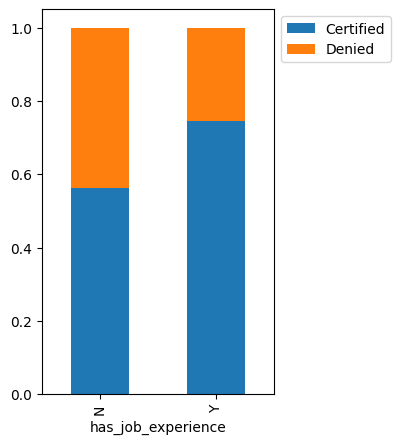

In [55]:
stacked_barplot(data, 'has_job_experience', 'case_status')

* Employees without job experience are more likley to be denied at ~ 35% than those with job experience ~25%
* Employees with job experience have higher visa approval rates

4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?

In [56]:
# Find whether prevailing wage affects visa approval
data.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.137            Certified      1
                 Denied         0
2.956            Denied         1
                 Certified      0
3.003            Denied         1
                               ..
315497.600       Denied         0
318446.050       Certified      1
                 Denied         0
319210.270       Denied         1
                 Certified      0
Name: count, Length: 50908, dtype: int64

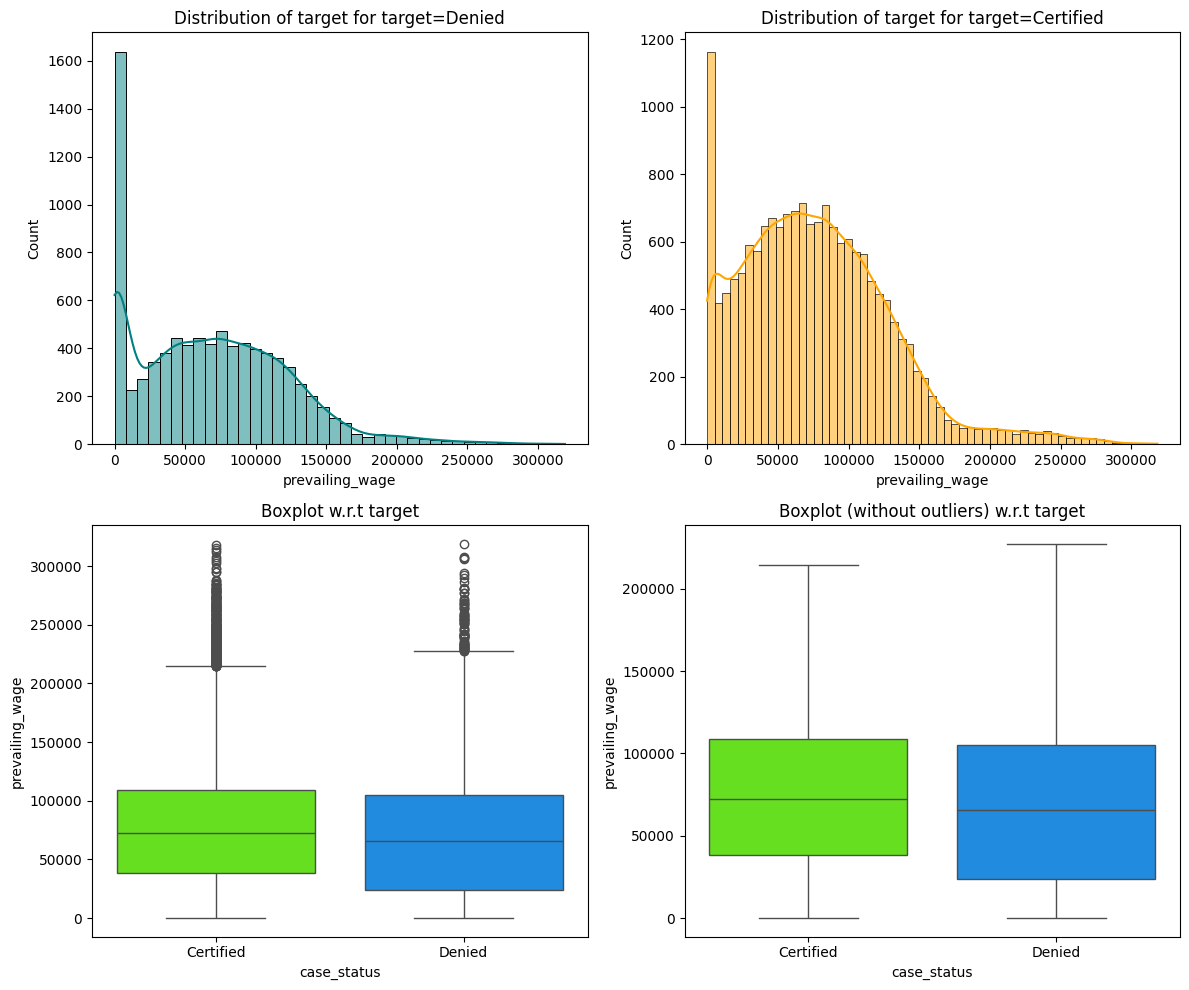

In [57]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

* In general, there does not appear to be a significant difference in visas certified and denied based on Prevailing Wage
* The IQR is more condensed for the certified visa when compared to denied, however both have a median around ~75,000 with denied visas having slightly lower prevailing wage, but a slightly longer whisker towards increase wages
* In both, prevailing wage greater than ~225,000 is considered an outlier
* The evidence does not support that higher wages lead to increased approval rates

In [58]:
data["prevailing_wage"].describe()

,prevailing_wage
count,25480.000
mean,74455.815
std,52815.942
min,2.137
25%,34015.480
50%,70308.210
75%,107735.513
max,319210.270


In [59]:
certified_prevailing_wage = data[data['case_status'] == 'Certified']['prevailing_wage']

In [60]:
certified_prevailing_wage.describe()

,prevailing_wage
count,17018.000
mean,77293.619
std,52042.716
min,2.137
25%,38375.330
50%,72486.270
75%,108879.107
max,318446.050


* The average prevailing wage of all candidates is 74,445 compared to average of certified candidates at 77,293; the median is 70,308 and 72,486 respectively.
* When comparing the prevailing wage of certified candidates to overall candidates, there does not appear to be a significant difference in values such as average or median, although of note prevailing wage of Certified candidates is slightly higher.


5. Do certain regions in the US have higher visa approval rates compared to others?

In [61]:
# Do certain regions in the US have higher visa approval rates compared to others
data.groupby('region_of_employment')['case_status'].value_counts()

region_of_employment  case_status
Island                Certified       226
                      Denied          149
Midwest               Certified      3253
                      Denied         1054
Northeast             Certified      4526
                      Denied         2669
South                 Certified      4913
                      Denied         2104
West                  Certified      4100
                      Denied         2486
Name: count, dtype: int64

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


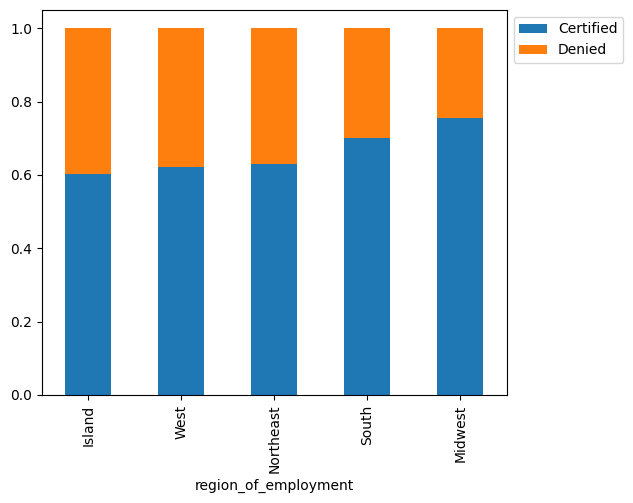

In [62]:
stacked_barplot(data, 'region_of_employment', 'case_status')

* The Island, West and Northeast region have the most denials when compared to other regions
* Proportionally, the Midwest appears to have the most certified visas compared to other regions followed by the South

6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?

In [63]:
# How does number of employees in a company influence visa approval
data.groupby('no_of_employees')['case_status'].value_counts()

no_of_employees  case_status
-26              Certified      4
                 Denied         3
-25              Certified      4
                 Denied         1
-17              Certified      2
                               ..
 581468          Denied         0
 594472          Denied         1
                 Certified      0
 602069          Certified      1
                 Denied         0
Name: count, Length: 14210, dtype: int64

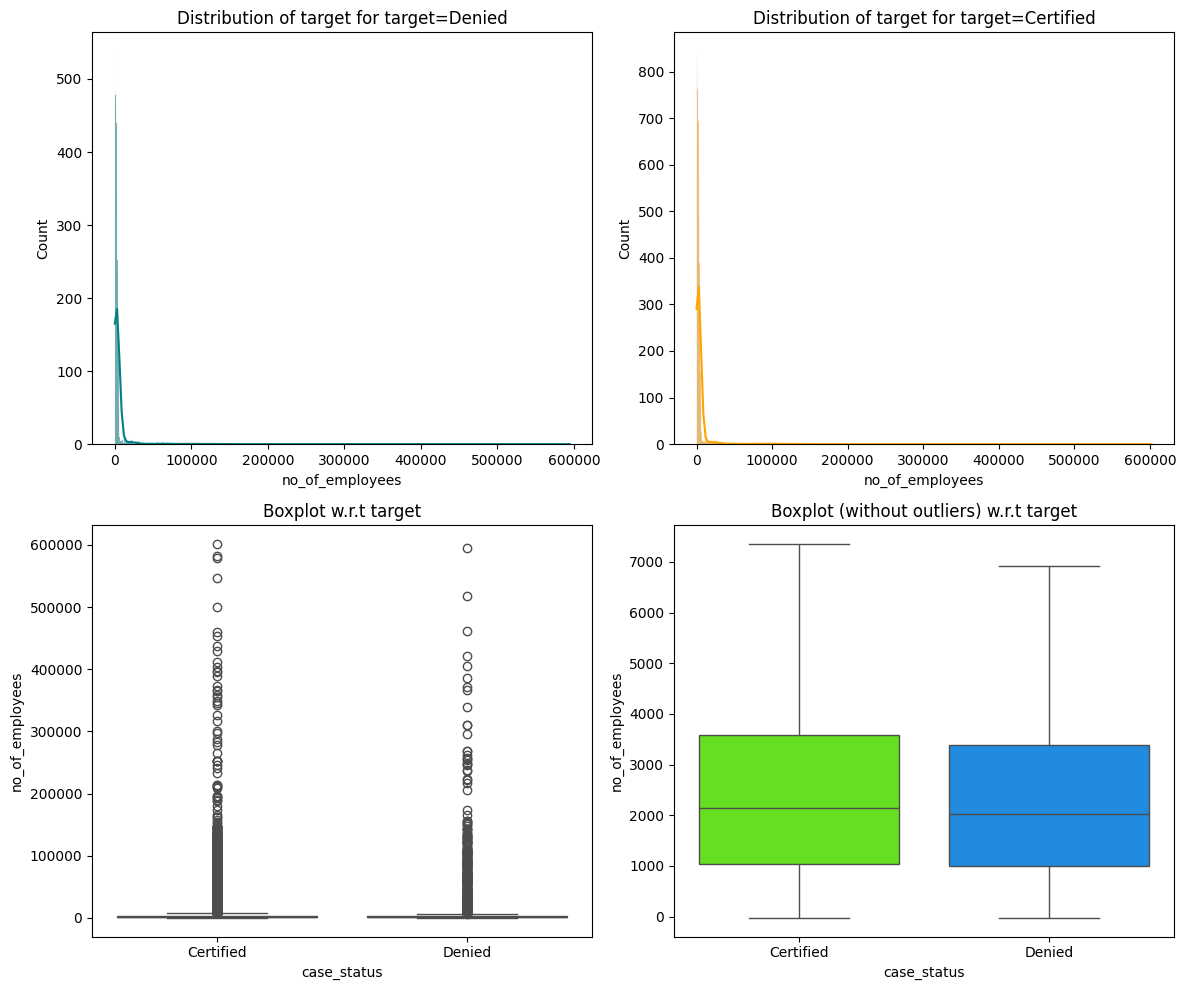

In [64]:
distribution_plot_wrt_target(data, 'no_of_employees', 'case_status')

* It does not appear that larger companies have higher approval rates
* Based on the above visualizations, there is no significant difference between certified and denied based on Number of Employees
* The IQR for both certified and denied lies between 1,000 and 4,000 employees and outliers for both being > ~7,500 employees

In [65]:
data["no_of_employees"].describe()

,no_of_employees
count,25480.000
mean,5667.043
std,22877.929
min,-26.000
25%,1022.000
50%,2109.000
75%,3504.000
max,602069.000


* As noted below, the maximum number of employees in this dataset is 602,069 employees with majority of companies on the lower end of the range (75% at 3,504 employees)
* Also, counts above show some values in the negative range - this may indicate a mistake in the dataset and may warrant furher investigation

In [66]:
# observations on no_of_employees in the negative range
negative_no_of_employees = data[data['no_of_employees']<0]
print(negative_no_of_employees.head())

          continent education_of_employee has_job_experience  \
245          Europe              Master's                  N   
378            Asia            Bachelor's                  N   
832   South America              Master's                  Y   
2918           Asia              Master's                  Y   
6439           Asia            Bachelor's                  N   

     requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
245                      N              -25         1980            Northeast   
378                      Y              -11         2011            Northeast   
832                      N              -17         2002                South   
2918                     N              -26         2005              Midwest   
6439                     N              -14         2013                South   

      prevailing_wage unit_of_wage full_time_position case_status  
245         39452.990         Year                  Y   Cert

In [67]:
# count of negative number of employees
len(negative_no_of_employees)

33

* There are 33 records/ rows in the dataset with a negative value for Number of Employees
* Given the occurence happens more than once in the dataset with multiple different negative values, this may be something to discuss with OFLC in order to handle the data properly while also avoiding loss of information

7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

In [68]:
# Are visa approval rates different across various continents of employees
data.groupby('continent')['case_status'].value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: count, dtype: int64

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


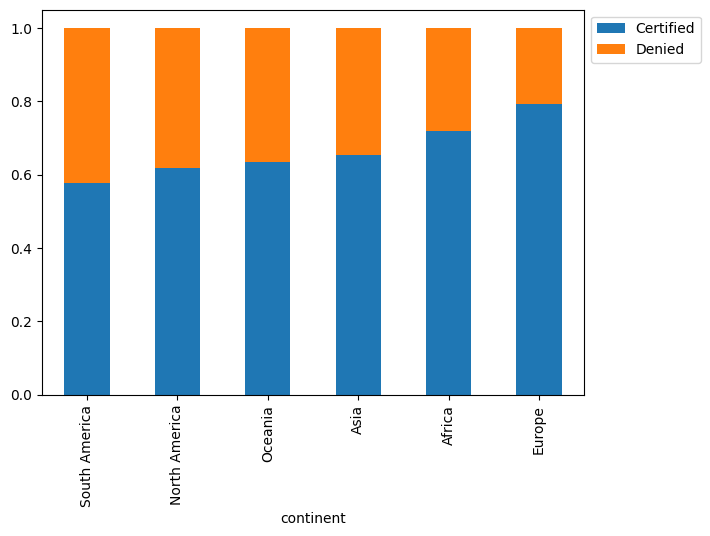

In [69]:
stacked_barplot(data, 'continent', 'case_status')

* Employees of South America have the most visas denied (lowest approval rate) followed by North America, then Oceania
* Europe has the most certified visas (least denials) therefore, highest approval rate followed by Africa

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

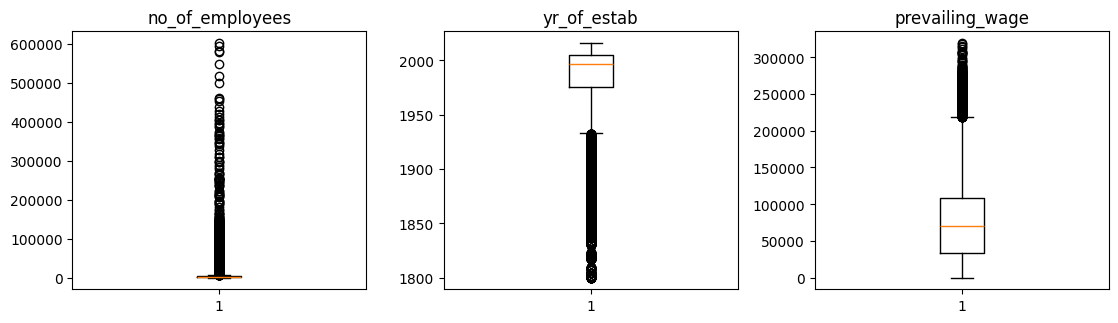

In [70]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* As noted prior to the EDA, there are no missing values in this dataset
* In addition, we will keep outliers as they are true values
* We will continue on to Feature Engineering

### Feature Engineering

In [71]:
# data["no_of_employees"].describe()

In [72]:
data1 = data.copy()

In [73]:
continent = {"Asia": 0, "Europe": 1, "North America": 2, "South America": 3, "Africa": 4, "Oceania": 5}
data1["continent"] = data1["continent"].map(continent)

education_of_employee = {"Bachelor's": 0, "Master's": 1, "High School": 2, "Doctorate": 3}
data1["education_of_employee"] = data1["education_of_employee"].map(education_of_employee)

# has_job_experience = {"No": 0, "Yes": 1}
# data1["has_job_experience"] = data1["has_job_experience"].map(has_job_experience)

# requires_job_training = {"No": 0, "Yes": 1}
# data1["requires_job_training"] = data1["requires_job_training"].map(requires_job_training)

region_of_employment = {"Northeast": 0, "South": 1, "West": 2, "Midwest": 3, "Island": 4}
data1["region_of_employment"] = data1["region_of_employment"].map(region_of_employment)

unit_of_wage = {"Hour": 0, "Week": 1, "Month": 2, "Year": 3}
data1["unit_of_wage"] = data1["unit_of_wage"].map(unit_of_wage)

# full_time_position = {"Part-Time": 0, "Full-Time": 1}
# data1["full_time_position"] = data1["full_time_position"].map(full_time_position)

In [74]:
data1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,2,N,N,14513,2007,2,592.203,0,Y,Denied
1,0,1,Y,N,2412,2002,0,83425.650,3,Y,Certified
2,0,0,N,Y,44444,2008,2,122996.860,3,Y,Denied
3,0,0,N,N,98,1897,2,83434.030,3,Y,Denied
4,4,1,Y,N,1082,2005,1,149907.390,3,Y,Certified


* Values have been encoded

### Data Preparation for Modeling

In [75]:
X = data1.drop(["case_status"], axis=1)
y = data1["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [76]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [77]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


### Reverse Mapping for Encoded Variables

In [78]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [79]:
inverse_mapping(continent, "continent")
inverse_mapping(education_of_employee, "education_of_employee")
inverse_mapping(region_of_employment, "region_of_employment")
inverse_mapping(unit_of_wage, "unit_of_wage")

* Checking inverse mapped values/ categories

### Train Dataset

In [80]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************


### Validation Dataset

In [81]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************


### Test Dataset

In [82]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************


* Inverse mapping returned original labels

### Creating Dummy Variables

In [83]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


* After encoding there are 21 columns

# **Model Building**

## Model evaluation criterion

**Model can make wrong predictions as:**
1. Predicting a candidate will be certified with visa, but the candidate is not approved (denied) - Loss of resources
2. Predicting a candidate will not be approved (denied) a visa but the candidate is approved (certifed)  - Loss of opportunity

**Which case is more important?**
* Predicting a candidate will not be approved but the candidate is approved i.e. losing a potential candidate as employers may miss out on hard-working, talented, and qualified individuals
* However, given that the OFLC had an increase in the overall number of processed applications from the previous year, and needs help in shortlisting the candidates having higher chances of VISA approval, we must take into account false positives

**How to reduce this loss?**
* In this case, we will look at the F1 score of the models
* Take into account the reduction of False Negatives - company would want Recall to be maximized as well, greater the Recall lesser the chances of false negatives.

Let's define a function to output different metrics (including F1) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.

In [84]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [85]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - Original Data


In [86]:
!pip install scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [87]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9896098804156048
Random forest: 1.0
GBM: 0.8289261156490839
Adaboost: 0.8204269947530306
dtree: 1.0

Validation Performance:

Bagging: 0.7775995333236109
Random forest: 0.8044975404075896
GBM: 0.8263223656809663
Adaboost: 0.8180081855388813
dtree: 0.746321365509123


In [88]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9896, Validation Score: 0.7776, Difference: 0.2120
Random forest: Training Score: 1.0000, Validation Score: 0.8045, Difference: 0.1955
GBM: Training Score: 0.8289, Validation Score: 0.8263, Difference: 0.0026
Adaboost: Training Score: 0.8204, Validation Score: 0.8180, Difference: 0.0024
dtree: Training Score: 1.0000, Validation Score: 0.7463, Difference: 0.2537


* GBM and Adaboost models have the best scores as per validation performance with the least overfitting and difference of only 0.0026 and 0.0024 respectively
* GBM has the best validation score of 0.8263 followed by Adaboost at 0.8180

### Model Building - Oversampled Data

In [89]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10210
Before Oversampling, counts of label 'Denied': 5078 

After Oversampling, counts of label 'Certified': 10210
After Oversampling, counts of label 'Denied': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [90]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9873554735547355
Random forest: 0.9999510308016257
GBM: 0.8049819427724789
Adaboost: 0.8005498403689252
dtree: 1.0

Validation Performance:

Bagging: 0.7654542733123784
Random forest: 0.7963176064441887
GBM: 0.8170454545454545
Adaboost: 0.8195334879279771
dtree: 0.7338237501876596


In [91]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9874, Validation Score: 0.7655, Difference: 0.2219
Random forest: Training Score: 1.0000, Validation Score: 0.7963, Difference: 0.2036
GBM: Training Score: 0.8050, Validation Score: 0.8170, Difference: -0.0121
Adaboost: Training Score: 0.8005, Validation Score: 0.8195, Difference: -0.0190
dtree: Training Score: 1.0000, Validation Score: 0.7338, Difference: 0.2662


* With Oversampling Data, GBM and Adaboost models have the best scores, actually performing better in the validation performance with negative values, -0.121 and -0.0190 respectively
* Adaboost has best validation score of 0.8195 followed by GBM with 0.8170

### Model Building - Undersampled Data

In [92]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [93]:
print("Before Under Sampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Certified': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Certified': 10210
Before Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, counts of label 'Certified': 5078
After Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [94]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166915
Random forest: 1.0
GBM: 0.7280390842034677
Adaboost: 0.7015343047380103
dtree: 1.0

Validation Performance:

Bagging: 0.7057046979865772
Random forest: 0.7427184466019418
GBM: 0.7777777777777778
Adaboost: 0.765990884802766
dtree: 0.6955818093542644


In [95]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9804, Validation Score: 0.7057, Difference: 0.2747
Random forest: Training Score: 1.0000, Validation Score: 0.7427, Difference: 0.2573
GBM: Training Score: 0.7280, Validation Score: 0.7778, Difference: -0.0497
Adaboost: Training Score: 0.7015, Validation Score: 0.7660, Difference: -0.0645
dtree: Training Score: 1.0000, Validation Score: 0.6956, Difference: 0.3044


* With undersampled data, Adaboost and GBM model have the best performances as per the validation performance.
* Again, the differences between the train and validations scores are -0.0645 and -0.0497 respectively as well as validation score of 0.76 for Adaboost and 0.777 GBM

* After building 15 models, it was observed that both the GBM and Adaboost models as well as on oversampled dataset, exhibited strong performance on both the training and validation datasets.
* As models might overfit with undersampling and oversampling, it's better to tune the models to get a generalized performance - We will tune these models using the same data (undersampled or oversampled) as we trained them on before

# **Model Performance Improvement**

### Tuning AdaBoostClassifier model with Undersampled data

In [96]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = 1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(75), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7139925554486263:
CPU times: user 1min 51s, sys: 207 ms, total: 1min 51s
Wall time: 1min 53s


In [97]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=75,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [98]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.704,0.744,0.688,0.715


In [99]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.719,0.739,0.822,0.778


### Tuning AdaBoostClassifier model with Oversampled data

In [100]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = 1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(100), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7771222055606701:
CPU times: user 3min 31s, sys: 424 ms, total: 3min 32s
Wall time: 3min 35s


In [101]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [102]:
# Checking model's performance on training set
adb_train1 = model_performance_classification_sklearn(tuned_adb1, X_train_over, y_train_over)
adb_train1

,Accuracy,Recall,Precision,F1
0,0.771,0.860,0.730,0.790


In [103]:
# Checking model's performance on validation set
adb_val1 = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb_val1

,Accuracy,Recall,Precision,F1
0,0.746,0.856,0.784,0.818


### Tuning  Gradient Boosting model with Undersampled Data

In [104]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(75), 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7144320411456077:
CPU times: user 3min 25s, sys: 551 ms, total: 3min 26s
Wall time: 3min 27s


In [105]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, random_state=1,
                           subsample=0.7)

In [106]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.714,0.746,0.701,0.723


In [107]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.723,0.736,0.830,0.780


### Tuning Gradient Boosting model with Oversampled data

In [108]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = 1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(100), 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7990058276878701:
CPU times: user 6min 7s, sys: 884 ms, total: 6min 8s
Wall time: 6min 12s


In [109]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [110]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.793,0.856,0.760,0.805


In [111]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.748,0.850,0.789,0.818


## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


# **Model Comparison and Final Model Selection**

In [112]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        adb_train1.T,
        gbm1_train.T,
        gbm2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data
Accuracy,0.704,0.771,0.714,0.793
Recall,0.744,0.860,0.746,0.856
Precision,0.688,0.730,0.701,0.760
F1,0.715,0.790,0.723,0.805


In [113]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ adb_val.T, adb_val1.T, gbm1_val.T, gbm2_val.T], axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data
Accuracy,0.719,0.746,0.723,0.748
Recall,0.739,0.856,0.736,0.850
Precision,0.822,0.784,0.830,0.789
F1,0.778,0.818,0.780,0.818


- Both GBM and Adaboost have an F1 score of 0.818 with GBM having the smallest difference between training and validation performance
- Of note, these results are similar to models with original data but hypertuned models may assist with overall generalization
- Gradient Boosting model trained with overampled data has generalized performance, so let's consider it as the best model.

In [114]:
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.738,0.848,0.779,0.812


* The GBM model trained on oversampled data has given ~81.2% F1 on the test set
* This performance is in line with what we achieved with this model on the train and validation sets
* So, this is a generalized model

### Feature Importance

In [115]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(tuned_gbm2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
education_of_employee_High School 0.255
region_of_employment_West         0.102
region_of_employment_Northeast    0.088
region_of_employment_South        0.088
prevailing_wage                   0.072
continent_Asia                    0.070
continent_North America           0.064
region_of_employment_Midwest      0.050
has_job_experience_Y              0.045
education_of_employee_Master's    0.036
continent_Europe                  0.033
continent_South America           0.022
unit_of_wage_Year                 0.021
education_of_employee_Doctorate   0.021
yr_of_estab                       0.012
no_of_employees                   0.009
full_time_position_Y              0.005
unit_of_wage_Week                 0.003
continent_Oceania                 0.002
requires_job_training_Y           0.001
unit_of_wage_Month                0.000


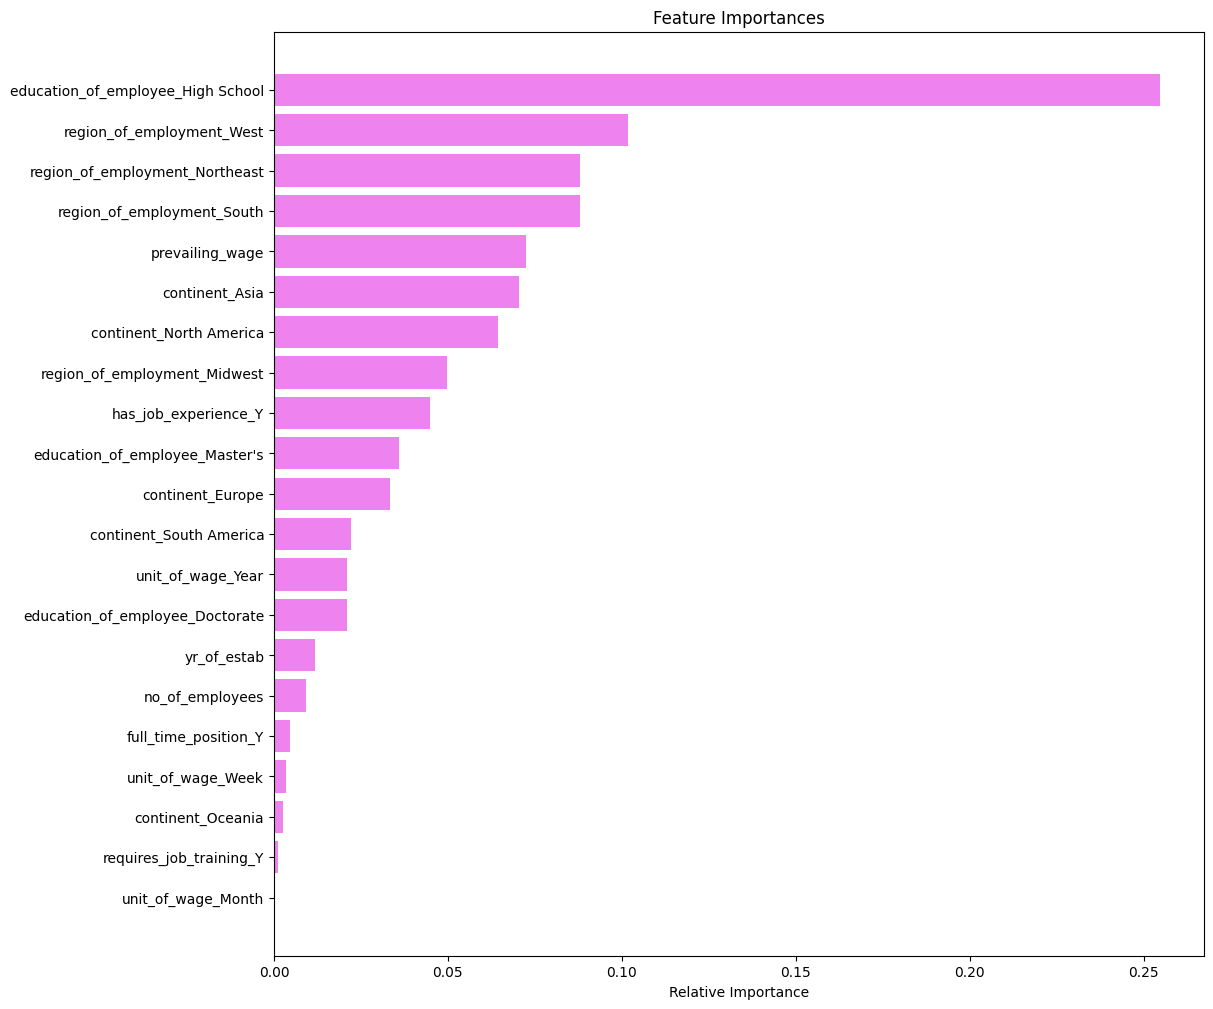

In [116]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can see that Education of Employee High School, Region of Employment West, Region of Employment NorthEast and Region of Employment South are the most important features in predicting certified vs denied visas.
* Prevailing Wage and Continents of Asia and North America follow

# **Actionable Insights and Recommendations**



* The education of the employee is the strongest determinant (specifically High School Degree) of the certification process. In the EDA we found:
  * Employees with only High School Degrees receive the most denials, significantly more than any other education level of employee
  *  According to this dataset, the higher the education level, the more likely they will be certified; the lower the education level, the more likely they will be denied
  
EasyVisa can surmise that a candidate with a High School Degree may likely be denied. Instead, profiles with higher degrees of education should be shortlisted to increase chances of approval for certification.

* Region of Employment West, Region of Employment NorthEast and Region of Employment South are the most important features in predicting certified vs denied visas. In the EDA, we found:
  * The Northeast (28.2%), South (27.5%), and West (25.8%) are most popular in the Intended region of employment, while the Island region is lowest at 1.5%
  * The Island, West and Northeast region have the most denials when compared to other regions
  * Proportionally, the Midwest appears to have the most certified visas compared to other regions followed by the South
  
EasyVisa can recommend candidates likely to be certified include those requesting South, while the NorthEast and West have more denials by comparison **

* Prevailing Wage follows the Regions in importance.
  * In general, there does not appear to be a significant difference in visas certified and denied based on Prevailing Wage. In both, prevailing wage greater than ~225,000 is considered an outlier

* Continents of Asia and North America are also high in feature importances
  * 66.2% employees are from Asia, significantly higher than other continents with Europe following at 14.6%
  * Employees of South America have the most visas denied (lowest approval rate) followed by North America, then Oceania
  * Europe has the most certified visas (least denials) therefore, highest approval rate followed by Africa

A suitable profile for the applicants for whom the visa should be certified may include candidates with higher level of education, candidates with intent to work in the South Region, prevailing wage < 225,000, and employees from Asia or Europe

On the other hand, suitable profile for applicants whom visa most likely to be denied may include candidates with High School Education, candidates with intent to work in the West and Northeast, prevailing wage > 225,000, and from South and North America


___